# Load the tests to compare

In [8]:
%matplotlib inline
import os
import sys
import json
import pickle
import pandas as pd
import matplotlib.pyplot as plt

__file__ = globals()['_dh'][0]

# get an absolute path to the directory that contains parent files
project_dir = __file__ = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(project_dir, '..', '..')))

from experiments.utils.constants import TESTS_RESULTS_PATH
series = 66
start_test = 0
end_test = 52
tests_ids = [i for i in range(start_test, end_test)]
tests_names = [i for i in range(start_test, end_test)]

tests = {}


for test_id, test_name in zip(tests_ids, tests_names):
    test_path = os.path.join(
        TESTS_RESULTS_PATH,
        'series',
        str(series),
        'tests',
        str(test_id))
    with open(os.path.join(test_path, 'info.json')) as cf:
        info = json.loads(cf.read())
    with open(os.path.join(test_path, 'episodes.pickle'), 'rb') as input_file:
        episodes = pickle.load(input_file)
    tests.update({test_name: {
        'info': info,
        'episodes': episodes
    }})
test_types = [test['info']['algorithm'] for _, test in tests.items()]
print("availeble tests:\n {}\ntests_types:\n {}".format(
    list(tests.keys()),
    test_types))

availeble tests:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
tests_types:
 ['PG', 'PG', 'PG', 'PG', 'PG', 'A2C', 'A2C', 'A2C', 'A2C', 'A2C', 'A3C', 'A3C', 'A3C', 'A3C', 'A3C', 'PPO', 'PPO', 'PPO', 'PPO', 'PPO', 'IMPALA', 'IMPALA', 'IMPALA', 'IMPALA', 'IMPALA', 'PG', 'PG', 'PG', 'PG', 'PG', 'A2C', 'A2C', 'A2C', 'A2C', 'A2C', 'A3C', 'A3C', 'A3C', 'A3C', 'A3C', 'PPO', 'PPO', 'PPO', 'PPO', 'PPO', 'IMPALA', 'IMPALA', 'IMPALA', 'IMPALA', 'IMPALA', 'binpacking', 'latency_greedy']


# Necessary stats of a test

In [9]:
final_stats = []
for test_id in range(start_test, end_test):
    users_distances_episodes_average = [episode['users_distances'].mean() for episode in tests[test_id]['episodes']]
    users_distances_test_average = sum(users_distances_episodes_average) / len(users_distances_episodes_average)
    num_consolidated_episodes_average = [episode['num_consolidated'].mean() for episode in tests[test_id]['episodes']]
    num_consolidated_test_average = sum(num_consolidated_episodes_average) / len(num_consolidated_episodes_average)
    # print(users_distances_episodes_average)
    # print(users_distances_test_average)
    # print(num_consolidated_episodes_average)
    # print(num_consolidated_test_average)
    final_stats.append({
        'test_id': test_id,
        # 'checkpoint': tests[test_id]['info']['checkpoint'],
        'network_id': tests[test_id]['info']['network_id'],
        'trace_id_test': tests[test_id]['info']['trace_id_test'],
        'sample_episode_users_distances': tests[test_id]['episodes'][0]['users_distances'],
        'sample_episode_num_consolidated': tests[test_id]['episodes'][0]['num_consolidated'],
        # 'experiments': tests[test_id]['info']['experiments'],
        'penalty_latency': tests[test_id]['info']['penalty_latency'],
        'penalalty_consolidated': tests[test_id]['info']['penalty_consolidated'],
        'users_distances_test_average': users_distances_test_average,
        'num_consolidated_test_average': num_consolidated_test_average
    })

final_stats_df = pd.DataFrame(final_stats)
final_stats_df['test_types'] = test_types
# final_stats_df.loc[df['penalalty_consolidated']]

# TODO add the following information to the table (from the info.json file)
# - penatly_latency
# - penalty_conslidation

In [10]:
tests[test_id]['info']

{'dataset_id': 6,
 'workload_id': 0,
 'network_id': 1,
 'trace_id': 2,
 'trace_id_test': 0,
 'experiment_id': 0,
 'episode_length': 3453,
 'algorithm': 'latency_greedy',
 'penalty_latency': 10,
 'penalty_consolidated': 4}

# compare tests - tables

In [11]:
final_stats_df

,test_id,network_id,trace_id_test,sample_episode_users_distances,sample_episode_num_consolidated,penalty_latency,penalalty_consolidated,users_distances_test_average,num_consolidated_test_average,test_types
0,0,1,0,0 0.492216 1 0.500377 2 0.44...,0 5 1 5 2 5 3 5 4 ...,2,4,0.603677,4.999204,PG
1,1,1,0,0 0.588597 1 0.596758 2 0.56...,0 6 1 6 2 6 3 6 4 ...,4,4,0.629868,5.998682,PG
2,2,1,0,0 0.696673 1 0.634024 2 0.57...,0 3 1 4 2 4 3 4 4 ...,6,4,0.627957,3.997263,PG
3,3,1,0,0 0.684060 1 0.622930 2 0.57...,0 3 1 4 2 4 3 4 4 ...,8,4,0.641778,3.997089,PG
4,4,1,0,0 0.718584 1 0.687778 2 0.59...,0 4 1 5 2 4 3 5 4 ...,10,4,0.642956,4.934144,PG
5,5,1,0,0 0.808369 1 0.783816 2 0.85...,0 1 1 2 2 2 3 0 4 ...,2,4,0.782918,3.632189,A2C
6,6,1,0,0 0.813912 1 0.562991 2 0.76...,0 1 1 2 2 2 3 2 4 ...,4,4,0.902581,2.802129,A2C
7,7,1,0,0 0.829284 1 0.610566 2 0.69...,0 1 1 1 2 2 3 3 4 ...,6,4,0.951337,3.162496,A2C
8,8,1,0,0 0.987794 1 0.760495 2 0.73...,0 3 1 2 2 2 3 3 4 ...,8,4,0.704960,4.127614,A2C
9,9,1,0,0 0.808578 1 0.705145 2 0.76...,0 2 1 2 2 1 3 2 4 ...,10,4,0.678513,5.676803,A2C


In [12]:
trace_id_test = 0
penalty_latency = 4

In [13]:
final_stats_df[
    ((final_stats_df['trace_id_test'] == trace_id_test) &
    (final_stats_df['penalty_latency'] == penalty_latency) |
    (final_stats_df['test_types'] == 'binpacking') |
    (final_stats_df['test_types'] == 'latency_greedy')) &
    (final_stats_df['test_types'] != 'A3C') &
    (final_stats_df['test_types'] != 'A2C')].sort_values(
        by=['users_distances_test_average'], ascending=False)[[
            'test_types',
            'penalty_latency',
            'users_distances_test_average',
            'num_consolidated_test_average',
        ]]


,test_types,penalty_latency,users_distances_test_average,num_consolidated_test_average
50,binpacking,10,1.196196,6.000000
16,PPO,4,1.134283,4.946525
21,IMPALA,4,0.648344,5.999406
1,PG,4,0.629868,5.998682
51,latency_greedy,10,0.184509,1.766001


In [14]:
final_stats_df[
    ((final_stats_df['trace_id_test'] == trace_id_test) &
    (final_stats_df['penalty_latency'] == penalty_latency) |
    (final_stats_df['test_types'] == 'binpacking') |
    (final_stats_df['test_types'] == 'latency_greedy')) &
    (final_stats_df['test_types'] != 'A3C') &
    (final_stats_df['test_types'] != 'A2C')].sort_values(
        by=['num_consolidated_test_average'])[[
            'test_types',
            'penalty_latency',
            'users_distances_test_average',
            'num_consolidated_test_average',
        ]]

,test_types,penalty_latency,users_distances_test_average,num_consolidated_test_average
51,latency_greedy,10,0.184509,1.766001
16,PPO,4,1.134283,4.946525
1,PG,4,0.629868,5.998682
21,IMPALA,4,0.648344,5.999406
50,binpacking,10,1.196196,6.000000


# Findings
1. A2C and A3C results are not explainable in both trainnig and testing
2. The ordering for consolidation is in most casses (only not in latency=2) latency_greedy<PG<PPO<IMPALA<binpacking
3. The ordering for latency is in most cases binpacking<PPO<IMPALA<PG<latency_greedy

In [15]:
final_stats_df[
    ((final_stats_df['trace_id_test'] == trace_id_test) &
    (final_stats_df['penalty_latency'] == penalty_latency) |
    (final_stats_df['test_types'] == 'binpacking') |
    (final_stats_df['test_types'] == 'latency_greedy'))].sort_values(
        by=['users_distances_test_average'], ascending=False)[[
            'test_types',
            'penalty_latency',
            'users_distances_test_average',
            'num_consolidated_test_average',
        ]]


,test_types,penalty_latency,users_distances_test_average,num_consolidated_test_average
50,binpacking,10,1.196196,6.000000
16,PPO,4,1.134283,4.946525
6,A2C,4,0.902581,2.802129
21,IMPALA,4,0.648344,5.999406
1,PG,4,0.629868,5.998682
11,A3C,4,0.628679,3.912019
51,latency_greedy,10,0.184509,1.766001


In [16]:
final_stats_df[
    ((final_stats_df['trace_id_test'] == trace_id_test) &
    (final_stats_df['penalty_latency'] == penalty_latency) |
    (final_stats_df['test_types'] == 'binpacking') |
    (final_stats_df['test_types'] == 'latency_greedy'))].sort_values(
        by=['num_consolidated_test_average'])[[
            'test_types',
            'penalty_latency',
            'users_distances_test_average',
            'num_consolidated_test_average',
        ]]

,test_types,penalty_latency,users_distances_test_average,num_consolidated_test_average
51,latency_greedy,10,0.184509,1.766001
6,A2C,4,0.902581,2.802129
11,A3C,4,0.628679,3.912019
16,PPO,4,1.134283,4.946525
1,PG,4,0.629868,5.998682
21,IMPALA,4,0.648344,5.999406
50,binpacking,10,1.196196,6.000000


# compare tests - plots

<AxesSubplot:xlabel='test_types'>

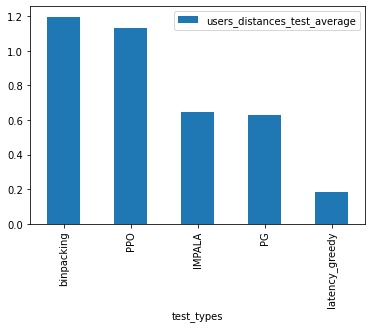

In [17]:
final_stats_df[
    ((final_stats_df['trace_id_test'] == trace_id_test) &
    (final_stats_df['penalty_latency'] == penalty_latency) |
    (final_stats_df['test_types'] == 'binpacking') |
    (final_stats_df['test_types'] == 'latency_greedy')) &
    (final_stats_df['test_types'] != 'A3C') &
    (final_stats_df['test_types'] != 'A2C')].sort_values(by=['users_distances_test_average'], ascending=False).plot.bar(x='test_types', y='users_distances_test_average')


<AxesSubplot:xlabel='test_types'>

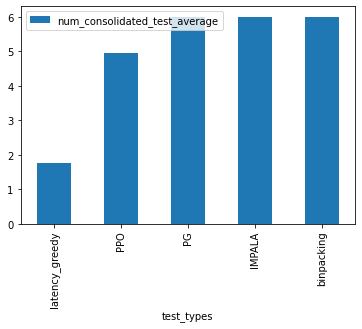

In [18]:
final_stats_df[
    ((final_stats_df['trace_id_test'] == trace_id_test) &
    (final_stats_df['penalty_latency'] == penalty_latency) |
    (final_stats_df['test_types'] == 'binpacking') |
    (final_stats_df['test_types'] == 'latency_greedy')) &
    (final_stats_df['test_types'] != 'A3C') &
    (final_stats_df['test_types'] != 'A2C')].sort_values(by=['num_consolidated_test_average']).plot.bar(x='test_types', y='num_consolidated_test_average')


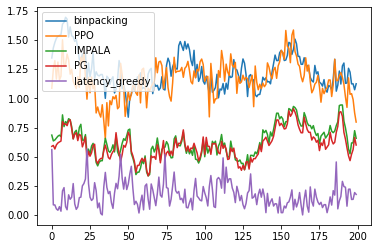

In [19]:
episodes_users_distances = final_stats_df[
    ((final_stats_df['trace_id_test'] == trace_id_test) &
    (final_stats_df['penalty_latency'] == penalty_latency) |
    (final_stats_df['test_types'] == 'binpacking') |
    (final_stats_df['test_types'] == 'latency_greedy')) &
    (final_stats_df['test_types'] != 'A3C') &
    (final_stats_df['test_types'] != 'A2C')].sort_values(by=['users_distances_test_average'], ascending=False)[['sample_episode_users_distances', 'test_types']]

for _, row in episodes_users_distances.iterrows():
    plt.plot(row['sample_episode_users_distances'][:200], label=row['test_types'])
    plt.legend()
    # print(f"test_types: {row['test_types']}")
    # print(f"sample episdoe users distances: {row['sample_episode_users_distances'].tolist()}")
plt.show()


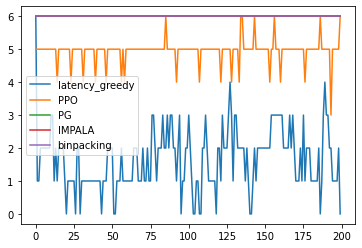

In [20]:
epidsodes_num_consolidated = final_stats_df[
    ((final_stats_df['trace_id_test'] == trace_id_test) &
    (final_stats_df['penalty_latency'] == penalty_latency) |
    (final_stats_df['test_types'] == 'binpacking') |
    (final_stats_df['test_types'] == 'latency_greedy')) &
    (final_stats_df['test_types'] != 'A3C') &
    (final_stats_df['test_types'] != 'A2C')].sort_values(by=['num_consolidated_test_average'])[['sample_episode_num_consolidated', 'test_types']]
for _, row in epidsodes_num_consolidated.iterrows():
    plt.plot(row['sample_episode_num_consolidated'][:200], label=row['test_types'])
    plt.legend()
    # print(f"test_types: {row['test_types']}")
    # print(f"sample episdoe num consolidated: {row['sample_episode_num_consolidated'].tolist()}")
plt.show()

